# Análisis de datos y uso de Gradient Boosting para la predicción de clientes desertores                          

## Contenido

#### 1. Introducción

    * Identificación del problema
    * Los datos como alternativa de solución
    * Objetivos
    
#### 2. Importación de librerías y carga de datos

    
#### 3. Exploración de los datos

    * Eliminación y codificación de variables   
    
#### 4. Preprocesamiento de datos

    * Identificación de outliers
    * Identificación e imputación de valores faltantes
       
#### 5. Análisis y visualización de datos

#### 6. Transformación de datos

    * Rebalanceo de datos
    * Reducción de la dimensionalidad    

#### 7. Construcción y evaluación del modelo predictivo

    * Elección de hiperparámetros
    * Comparación y elección del mejor modelo
    
#### 8. Conclusiones

---

## 1. Introducción

#### Identificación del problema

Se identifica que la problemática a tratar es el abandono de clientes a los servicios de una empresa de telecomunicaciones, es bien sabido que esta industria posee una tasa de abandono relativamente alta, variando entre el 15 y 20%, debido a que existe una gran competitividad en el mercado, por lo tanto al momento de replantearnos cuál o cuáles pueden ser los factores definitivos que propician el abandono de los clientes nos ponemos a pensar que puede ser causado por múltiples factores, desde un mal servicio, costes muy altos para su presupuesto, o porque simplemente desean probar otras opciones (lo que como ya mencionamos, es muy normal debido a la fuerte competencia en el sector). 
Debido a todo lo anterior mencionado, las empresas buscan a toda costa retener a sus clientes, y aqui es donde surge la interrogante, ¿A que cliente es al que debo retener?. Puesto que sin un analísis de los datos es imposible saber que clientes tienen intenciones de abandonar su servicio o no. Intentar ejecutar una retención individualizada a cada uno de sus clientes no es factible debido a que estas empresas cuentan con demasiadas personas suscritas a sus servicios, por lo cual seria una gran pérdida de tiempo intentar retener a esta gran cantidad de personas, además que se superaría rápidamente el presupuesto asignado para esta labor y sin aun lograr resultados convincentes.

#### Los datos como alternativa de solución

Llegado a este punto, es necesario que la empresa utilice los datos a su favor, los vea como un activo estratégico para la resolución de problemas y toma de decisiones acertivas, que en este caso es identificar los clientes propensos a abandonar su servicio y centrar todos sus esfuerzos en intentar retenerlos, a la vez que tambien los vea como una inversión, puesto que al solventar el problema de la deserción, lograrán tener mas clientes, y por ende, aumentar sus ingresos, los cuales pueden ser usados para mantener o incrementar su posición en el mercado o en otras tareas de mayor o igual relevancia. Para lograr este objetivo, utilizaremos el análisis exploratorio de los datos para lograr responder algunas preguntas acerca del comportamiento de los clientes y su relación con el abandono de la empresa, a la vez que aprovecharemos la potencia y eficacia que nos ofrecen los algoritmos de machine learning, para que dado una serie de caracteristicas del cliente, nos de una estimación concreta acerca si en el futuro abandonará los servicios de la empresa o no.

#### Objetivos

* Analizar los datos y encontrar patrones y comportamientos que expliquen la deserción de los clientes.
* Construir un modelo de aprendizaje automático para la predicción de clientes desertores en la empresa.


---

## 2. Importación de librerías y carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
from xgboost import XGBClassifier
import optuna  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

El conjunto de datos con el que vamos a tratar almacena características de 7043 clientes a los que una empresa de telecomunicaciones proporcionó servicios de telefonía e internet en el tercer trimestre del año, e indica si estos al final de este periodo de tiempo desertaron de sus servicios o no .

In [2]:
data = pd.read_csv("Telco_Churn.csv")

---

## 3. Exploración de los datos

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6950 non-null   object 
 2   SeniorCitizen     6891 non-null   float64
 3   Partner           6798 non-null   object 
 4   Dependents        6780 non-null   object 
 5   tenure            6823 non-null   float64
 6   PhoneService      6726 non-null   object 
 7   MultipleLines     6641 non-null   object 
 8   InternetService   6731 non-null   object 
 9   OnlineSecurity    6692 non-null   object 
 10  OnlineBackup      6673 non-null   object 
 11  DeviceProtection  6812 non-null   object 
 12  TechSupport       6644 non-null   object 
 13  StreamingTV       6630 non-null   object 
 14  StreamingMovies   6573 non-null   object 
 15  Contract          6878 non-null   object 
 16  PaperlessBilling  6736 non-null   object 


#### Eliminación y codificación de variables

Obsevamos que en nuestro conjunto de datos tenemos una columna llamada "customerID", el cuál es un conjunto de números y letras que hacen referencia al ID del cliente, debido a que no es una variable relevante para nuestro estudio y construcción del modelo predictivo, se procederá a eliminarla.

In [6]:
data = data.drop(['customerID'], axis=1)

También se observa que algunas variables estan etiquetadas incorrectamente con un tipo de dato que no les corresponde, como en el caso de "SeniorCitizen":float y "TotalCharges":object, es por ello que se procederá a convertirlas al tipo de dato correcto.

In [7]:
# Conversión de la columna "SeniorCitizen" a object
data = data.astype({"SeniorCitizen":object})

In [8]:
# Conversión de la columna "TotalCharges" a float
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6891 non-null   object 
 2   Partner           6798 non-null   object 
 3   Dependents        6780 non-null   object 
 4   tenure            6823 non-null   float64
 5   PhoneService      6726 non-null   object 
 6   MultipleLines     6641 non-null   object 
 7   InternetService   6731 non-null   object 
 8   OnlineSecurity    6692 non-null   object 
 9   OnlineBackup      6673 non-null   object 
 10  DeviceProtection  6812 non-null   object 
 11  TechSupport       6644 non-null   object 
 12  StreamingTV       6630 non-null   object 
 13  StreamingMovies   6573 non-null   object 
 14  Contract          6878 non-null   object 
 15  PaperlessBilling  6736 non-null   object 
 16  PaymentMethod     6940 non-null   object 


Ahora podemos observar que cada variable esta codificada con el tipo de dato que le corresponde

---

## 4. Preprocesamiento de datos

#### Identificación de outliers

Mediante un diagrama de caja o bigote identificaremos visualmente si existen outliers en las columnas numéricas de nuestro conjunto de datos a través del rango intercuartílico.

Se separarán en dos gráficos, debido a que la variable "TotalCharges" posee valores muy altos en comparación con las demas variables, lo cual ocasiona que no se visabilizen bien los gráficos


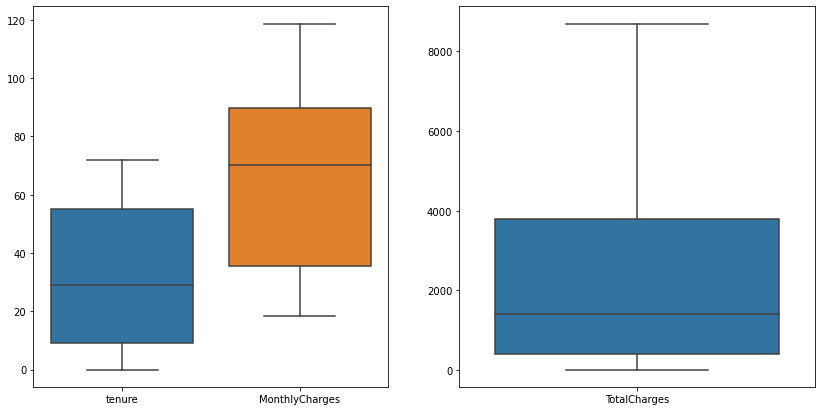

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.boxplot(ax=ax[0], data= data[["tenure", "MonthlyCharges"]])
sns.boxplot(ax=ax[1], data= data[["TotalCharges"]])
plt.show()

Podemos observar la inexistencia de outliers, por lo que no será necesario tomar medidas al respecto.

#### Identificación e imputación de valores faltantes

In [11]:
# Observamos cuantos valores faltantes hay en nuestro conjunto de datos
data.isnull().sum().sum()

4824

In [12]:
# Observamos cuantos valores faltantes hay en cada variable
data.isnull().sum()

gender               93
SeniorCitizen       152
Partner             245
Dependents          263
tenure              220
PhoneService        317
MultipleLines       402
InternetService     312
OnlineSecurity      351
OnlineBackup        370
DeviceProtection    231
TechSupport         399
StreamingTV         413
StreamingMovies     470
Contract            165
PaperlessBilling    307
PaymentMethod       103
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [13]:
# Y observamos el porcentaje de valores faltantes respecto del total de datos
data.isnull().sum().sum() / (data.shape[0] * (data.shape[1]-1)) * 100

3.6049231413049165

Los resultados nos arrojan un total de 4824 valores nulos de los 133817 que cuenta el conjunto de datos, estos valores nulos suponen un 3,6% del total de datos. Obtenida esta informacion, procederemos a imputarlos mediante el uso de algoritmos de regresión, técnica conocida con el nombre de imputación simple e imputación iterativa.

Para ello empezaremos a dividir nuestro conjunto de datos en tres grupos, el primero de variables numéricas, el segundo de variables categóricas y el último de la variable de salida, ya que las técnicas de imputacion para los dos primeros conjuntos seran distintas, y el tercer conjunto lo excluimos de la imputación puesto que nuestra variable de salida no puede influir en este proceso.

In [14]:
numericas = data.iloc[:, [4,17,18]]
categoricas = data.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]]
salida = data.iloc[:, -1]

Extraeremos los nombres tanto de nuestras variables categóricas como numéricas, ya que en el proceso de imputación estos nombres seran eliminados.

In [15]:
col_numericas = numericas.columns.values
col_categoricas = categoricas.columns.values

Empezaremos imputando nuestras variables categóricas mediante un imputador simple utilizando la técnica de reemplazar por el mas frecuente, es decir, la moda.

In [16]:
imputer_categorico = SimpleImputer(strategy='most_frequent')
imputer_categorico.fit(categoricas)
categoricas = imputer_categorico.transform(categoricas)

Y ahora le regresaremos el formato original en el que se encontraba en nuestro conjunto de datos

In [17]:
categoricas = pd.DataFrame(categoricas)
categoricas.columns = col_categoricas

Proseguiremos imputando nuestras variables numéricas mediante un imputador iterativo, utilizando el algoritmo de los bosques aleatorios de regresión para estimar los valores faltantes en base a los valores no faltantes de las demás variables. Cabe mencionar que no es necesario escalar nuestros datos numéricos cuando utilizamos un algoritmo Random Forest.

In [18]:
imputer_numerico = IterativeImputer(estimator=RandomForestRegressor())
imputer_numerico.fit(numericas)
numericas = imputer_numerico.transform(numericas)

Como hicimos con el conjunto anterior, le regresamos el formato original

In [19]:
numericas = pd.DataFrame(numericas)
numericas.columns = col_numericas

Y redondeamos los decimales para tener el mismo formato númerico de los datos originiales

In [20]:
numericas["tenure"] = numericas["tenure"].round()

Transformamos también la variable de salida a su formato original

In [21]:
salida = pd.DataFrame(salida)

Por último, unimos los tres conjuntos de datos para tener un solo DataFrame como al inicio de la sección

In [22]:
data = pd.concat([categoricas, numericas, salida], axis=1)

##### Comprobamos nuevamente si existen valores faltantes

In [23]:
data.isnull().sum().sum()

0

In [24]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Y ahora observamos que los métodos utilizados imputaron de forma satisfactoria los valores faltantes.

---

## 5. Análisis y visualización de datos

En base a las variables que tenemos disponible empezaremos la sección formulando algunas hipótesis que seran respondidas mediante el proceso de análisis de los datos.


* H1: ¿El género del cliente propicia la deserción de los servicios de la empresa?
* H2: ¿Son los clientes de la tercera edad mas propensos a desertar?
* H3: ¿Los clientes sin pareja son mas propensos a permanecer en la empresa?
* H4: ¿Si el cliente no vive con personas dependientes tiene mas probabilidades de abandonar la empresa?
* H5: ¿Es más probable que los clientes que no tienen servicio telefónico abandonen la empresa?
* H6: ¿Los clientes con múltiples lineas telefónicas son más propensos a permanecer en la empresa?
* H7: ¿Es más probable que los clientes abandonen la empresa si no tienen conexión a internet?
* H8: ¿Los clientes sin servicio de seguridad en línea tienden a abandonar la empresa?
* H9: ¿Los clientes sin servicio de copia de seguridad en línea tienden a abandonar la empresa?
* H10: ¿Los clientes sin servicio de protección de dispositivos tienden a abandonar la empresa?
* H11: ¿Los clientes sin servicio de soporte técnico tienden a abandonar la empresa?
* H12: ¿Los clientes sin servicio de transmisión televisiva tienden a abandonar la empresa?
* H13: ¿Los clientes sin servicio de transmisión de películas tienden a abandonar la empresa?
* H14: ¿Los clientes con mayor cantidad de meses en la empresa son más propensos a seguir permaneciendo en ella?
* H15: ¿Los clientes con poca cantidad de dinero mensual a pagar son más propensos a permanecer en la empresa?
* H16: ¿Los clientes con poca cantidad de dinero total a pagar son más propensos a permanecer en la empresa?
* H17: ¿El el tipo de contrato elegido por el cliente un factor que indique su deserción de la empresa?
* H18: ¿Los clientes que eligen facturación electrónica son más propensos a abandonar la empresa?
* H19: ¿Existe algún método de pago en particular preferido por los clientes desertores?


Para comenzar, visualizaremos la distribución de los datos respecto a cada uno de los tres conjuntos de
variables que se han identificado: Variables de información del cliente - Variables de servicio - Variables de contrato. Esta segmentación nos permitirá realizar un análisis mas ordenado e identificar patrones e información util para entender nuestros datos.

#### Variables de información del cliente

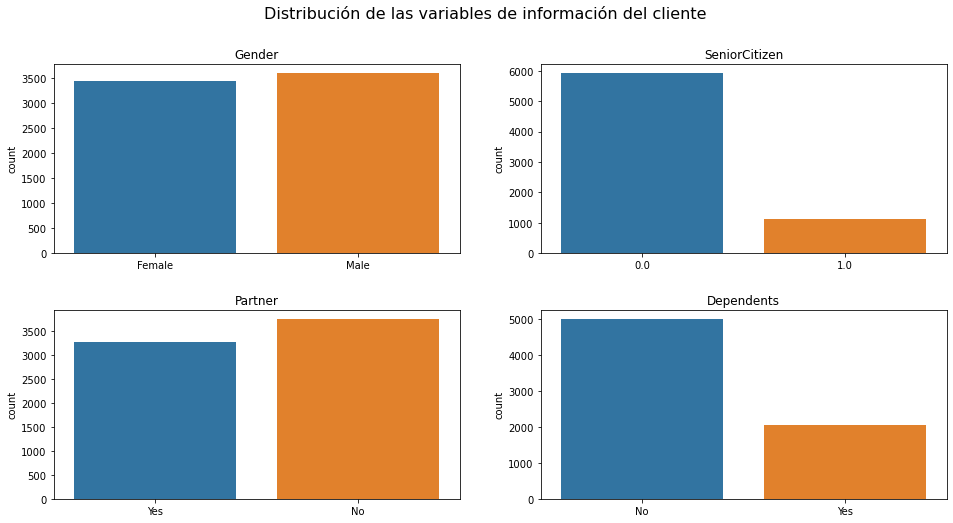

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
sns.countplot(data=data, x="gender", ax=ax[0,0])
ax[0,0].set_title("Gender")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="SeniorCitizen", ax=ax[0,1])
ax[0,1].set_title("SeniorCitizen")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="Partner", ax=ax[1,0])
ax[1,0].set_title("Partner")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="Dependents", ax=ax[1,1])
ax[1,1].set_title("Dependents")
ax[1,1].set_xlabel("")
fig.suptitle('Distribución de las variables de información del cliente', fontsize=16)
plt.show()

Observamos que tenemos una distribución equitativa en nuestras variables "gender" y "Partner", lo cual nos indica que ningún género predomina sobre el otro en la empresa, a la vez que hay tantas personas con pareja como sin pareja.

Por otro lado observamos que predominan más las personas menores de 65 años, y que la mayoría de ellos no viven con personas dependientes.

#### Variables de servicio

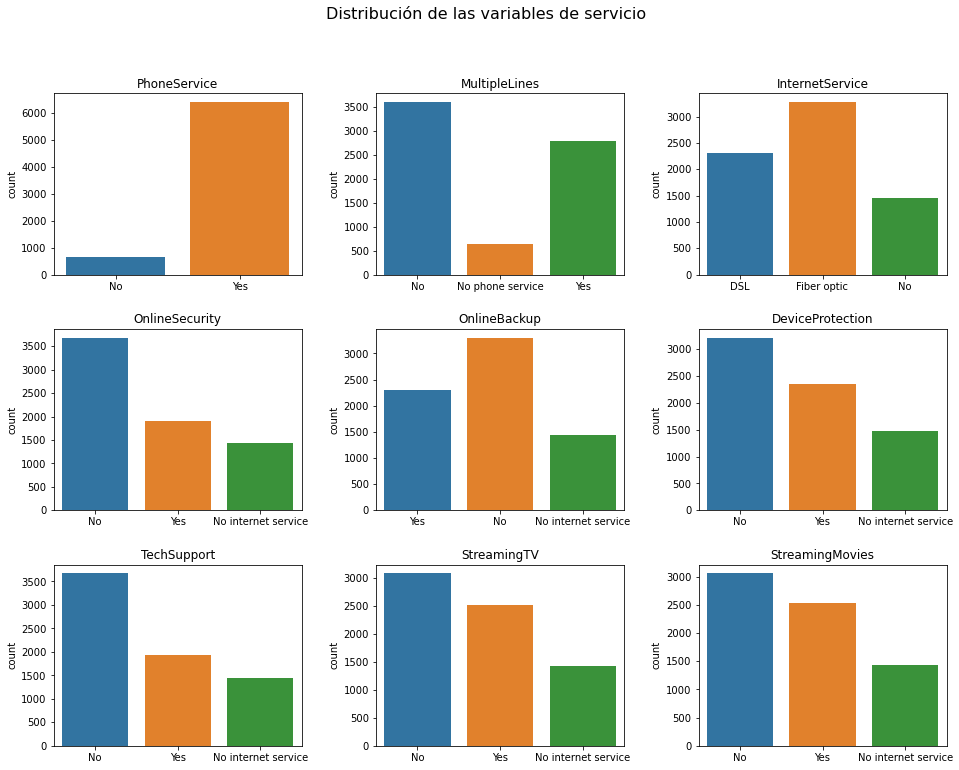

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.countplot(data=data, x="PhoneService", ax=ax[0,0])
ax[0,0].set_title("PhoneService")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="MultipleLines", ax=ax[0,1])
ax[0,1].set_title("MultipleLines")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="InternetService", ax=ax[0,2])
ax[0,2].set_title("InternetService")
ax[0,2].set_xlabel("")
sns.countplot(data=data, x="OnlineSecurity", ax=ax[1,0])
ax[1,0].set_title("OnlineSecurity")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="OnlineBackup", ax=ax[1,1])
ax[1,1].set_title("OnlineBackup")
ax[1,1].set_xlabel("")
sns.countplot(data=data, x="DeviceProtection", ax=ax[1,2])
ax[1,2].set_title("DeviceProtection")
ax[1,2].set_xlabel("")
sns.countplot(data=data, x="TechSupport", ax=ax[2,0])
ax[2,0].set_title("TechSupport")
ax[2,0].set_xlabel("")
sns.countplot(data=data, x="StreamingTV", ax=ax[2,1])
ax[2,1].set_title("StreamingTV")
ax[2,1].set_xlabel("")
sns.countplot(data=data, x="StreamingMovies", ax=ax[2,2])
ax[2,2].set_title("StreamingMovies")
ax[2,2].set_xlabel("")
fig.suptitle('Distribución de las variables de servicio', fontsize=16)
plt.show()

De los resultados obtenimos podemos indicar lo siguiente:

* Existe una inmensa mayoría de clientes que han adquirido los servicios de telefonía de la empresa, lo cual nos indica que es el servicio más demandado y básico que ofrece la compañía.

* Hay una distribución relativamente equitativa entre el número de clientes que tiene múltiples líneas y no, lo cual es común puesto que es un servicio opcional.

* La mayoria de los usuarios prefiere una conexión de fibra óptica como servicio de internet, ya que esta es mucho más rápida y de calidad que otros tipos de conexión convencionales.

* Observamos una tendencia de los usuarios a no contar con los servicios de seguridad que ofrece la empresa, podemos suponer múltiples razones, desde una mala calidad en estos servicios hasta costos elevados en la mensualidad por adquirirlos.

* Por último, observamos que existe una ligera diferencia entre la cantidad de clientes que eligen adquirir servicios de transmisión de TV a través de su servicio de internet y los que no lo hacen.

#### Variables de contrato

Text(0.5, 0.98, 'Distribución de las variables de contrato')

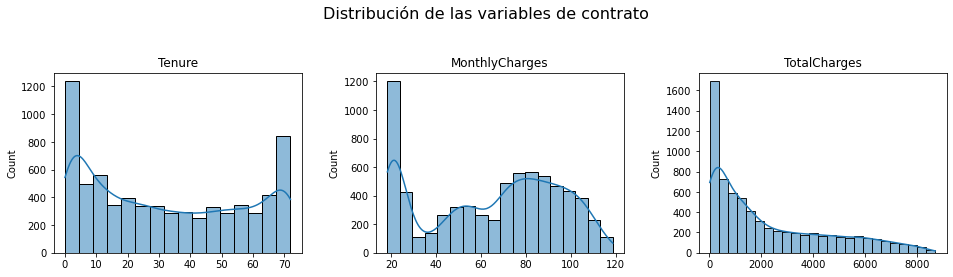

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3, top=0.75)
sns.histplot(data=data, x="tenure", kde=True, ax=ax[0])
ax[0].set_title("Tenure")
ax[0].set_xlabel("")
sns.histplot(data=data, x="MonthlyCharges", kde=True, ax=ax[1])
ax[1].set_title("MonthlyCharges")
ax[1].set_xlabel("")
sns.histplot(data=data, x="TotalCharges", kde=True, ax=ax[2])
ax[2].set_title("TotalCharges")
ax[2].set_xlabel("")
fig.suptitle('Distribución de las variables de contrato', fontsize=16)

De estos resultados se extrae la siguiente información:

* Existen dos grandes picos en la distribución que muestra la cantidad de meses que el cliente a permanecido en la empresa al finalizar el trimestre, siendo estos los que han permanecido en un rango menor a 5 meses, y los que han permanecido en un rango mayor a 65 meses, lo que significa que la empresa cuenta con tantos clientes fieles como nuevos en la adquisición de sus servicios.

* Por otra parte, observamos que la variable de los cargos mensuales "MonthlyCharges" presenta 3 picos notables, siendo el mayor de estos los que tienen cargos mensuales alrededor de 20 dólares, seguido de otro con alrededor de 80 dólares, y por ultimo, uno con alrededor de 50 dólares. Esto quiere decir que tenemos una cantidad considerable de clientes que prefieren los contratos con poca mensualidad a pagar (los cuales probablemente incluyan menos servicios). 

* La variable de los cargos totales "TotalCharges" presenta una distribución de cola en donde el único pico que presenta es en los cargos con poca cantidad de dólares a pagar por los clientes, lo cual guarda relación con los anteriores gráficos donde vimos que existe una gran cantidad de clientes con pocos meses en la empresa y con cargos mensuales bajos.

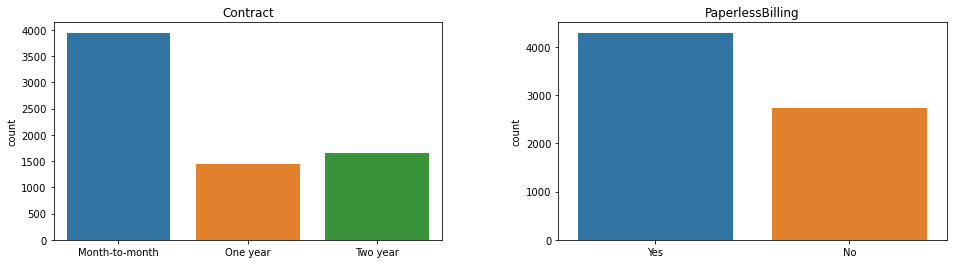

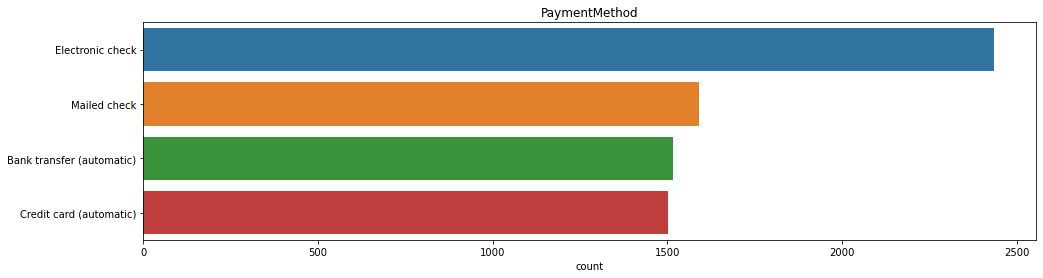

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=data, x="Contract", ax=ax[0])
ax[0].set_title("Contract")
ax[0].set_xlabel("")
sns.countplot(data=data, x="PaperlessBilling", ax=ax[1])
ax[1].set_title("PaperlessBilling")
ax[1].set_xlabel("")
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.countplot(data=data, y="PaymentMethod")
ax.set_title("PaymentMethod")
ax.set_ylabel("")
plt.show()

* Observamos que el contrato preferido por los clientes es el de "Month to month", el cual es el más corto de todos, lo cual guarda cierta relación con el gráfico anterior donde vimos que había una gran cantidad de clientes con pocos meses de permanencia en la empresa.

* Por otra parte, observamos que los usuarios de la empresa mayormente prefieren facturación electronica.

* Por ultimo, observamos que la mayoría de clientes prefiere el método de pago con cheque electrónico, la distribución de los demas metodos se mantiene de forma equitativa entre ellos.

Una vez conocida la distribución de las variables con las que vamos a trabajar, procederemos a responder las hipótesis que inicialmente habíamos planteado, esto lo lograremos mediante un análisis bivariado de nuestras variables de entrada con nuestra variable de salida.